In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

### Creating the dataset
An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
The trial had 2100 participants. Half of them were under 65 and other half above 65.
Around 95% under 65 years of age did not experience anz side effects.
Around 95% above 65 years of age experienced side effects

In [3]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels , train_samples = shuffle(train_labels, train_samples)

In [5]:
print(train_labels.shape, train_samples.shape)

(2100,) (2100,)


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
print(scaled_train_samples.shape)

(2100, 1)


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(f'Num of GPU available: {len(physical_devices)}')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num of GPU available: 1


In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#without validation split
model.fit(x=scaled_train_samples,y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.3473 - accuracy: 0.8690
Epoch 2/30
210/210 - 0s - loss: 0.2624 - accuracy: 0.9219
Epoch 3/30
210/210 - 0s - loss: 0.2553 - accuracy: 0.9286
Epoch 4/30
210/210 - 0s - loss: 0.2551 - accuracy: 0.9248
Epoch 5/30
210/210 - 0s - loss: 0.2484 - accuracy: 0.9214
Epoch 6/30
210/210 - 0s - loss: 0.2477 - accuracy: 0.9262
Epoch 7/30
210/210 - 0s - loss: 0.2352 - accuracy: 0.9400
Epoch 8/30
210/210 - 0s - loss: 0.2411 - accuracy: 0.9267
Epoch 9/30
210/210 - 0s - loss: 0.2360 - accuracy: 0.9324
Epoch 10/30
210/210 - 0s - loss: 0.2333 - accuracy: 0.9310
Epoch 11/30
210/210 - 0s - loss: 0.2258 - accuracy: 0.9400
Epoch 12/30
210/210 - 0s - loss: 0.2273 - accuracy: 0.9367
Epoch 13/30
210/210 - 0s - loss: 0.2200 - accuracy: 0.9419
Epoch 14/30
210/210 - 0s - loss: 0.2254 - accuracy: 0.9357
Epoch 15/30
210/210 - 0s - loss: 0.2218 - accuracy: 0.9381
Epoch 16/30
210/210 - 0s - loss: 0.2223 - accuracy: 0.9367
Epoch 17/30
210/210 - 0s - loss: 0.2225 - accuracy: 0.9376
Epoch 

In [13]:
#with validation split
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
model2.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(x=scaled_train_samples,y=train_labels, validation_split=0.2, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
168/168 - 2s - loss: 0.3354 - accuracy: 0.8792 - val_loss: 0.2144 - val_accuracy: 0.9643
Epoch 2/30
168/168 - 0s - loss: 0.2612 - accuracy: 0.9196 - val_loss: 0.2022 - val_accuracy: 0.9643
Epoch 3/30
168/168 - 0s - loss: 0.2640 - accuracy: 0.9161 - val_loss: 0.2406 - val_accuracy: 0.9143
Epoch 4/30
168/168 - 0s - loss: 0.2502 - accuracy: 0.9304 - val_loss: 0.2117 - val_accuracy: 0.9262
Epoch 5/30
168/168 - 0s - loss: 0.2520 - accuracy: 0.9286 - val_loss: 0.1915 - val_accuracy: 0.9643
Epoch 6/30
168/168 - 0s - loss: 0.2470 - accuracy: 0.9274 - val_loss: 0.1923 - val_accuracy: 0.9476
Epoch 7/30
168/168 - 0s - loss: 0.2522 - accuracy: 0.9232 - val_loss: 0.2489 - val_accuracy: 0.9143
Epoch 8/30
168/168 - 0s - loss: 0.2518 - accuracy: 0.9232 - val_loss: 0.1864 - val_accuracy: 0.9643
Epoch 9/30
168/168 - 0s - loss: 0.2412 - accuracy: 0.9286 - val_loss: 0.1841 - val_accuracy: 0.9643
Epoch 10/30
168/168 - 0s - loss: 0.2332 - accuracy: 0.9345 - val_loss: 0.1964 - val_accuracy: 0.9476

In [17]:
#creating test data
test_samples = []
test_labels = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [32]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
predictions_2 = model2.predict(x=scaled_test_samples, batch_size=10, verbose=0)
#for i in predictions:
#    print(i)
rounded_predictions = np.argmax(predictions, axis=1)
rounded_predictions_2 = np.argmax(predictions_2, axis=1)
#print(rounded_predictions)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools

In [33]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
cm_2 = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions_2)

In [28]:
#confusion matrix function from scikit learn
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                    horizontalalignment='center',
                    color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[195  15]
 [ 10 200]]


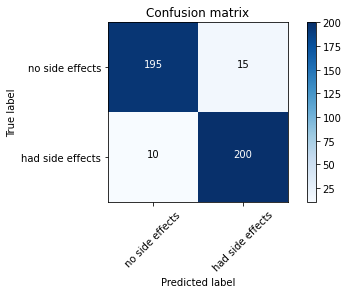

In [36]:
cm_plot_labels = ['no side effects', 'had side effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion matrix')

Confusion matrix, without normalization
[[195  15]
 [ 10 200]]


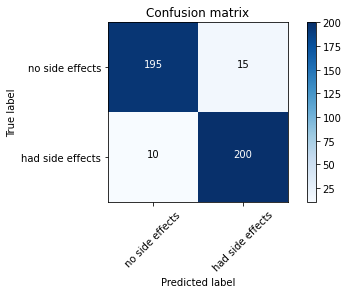

In [35]:
plot_confusion_matrix(cm=cm_2, classes=cm_plot_labels, title='Confusion matrix')

In [38]:
accuracy = accuracy_score(y_true=test_labels, y_pred=rounded_predictions)
print(accuracy)

0.9404761904761905
